In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Primo grafico R0

In [2]:
factor = 13 # Ultimo elemento ad avere collegamenti

In [3]:
# ogni elemento della lista fr si collega a quello con lo stesso indice nella lista to
fr = []
for i in range(factor):
    fr.extend((i+1, i+1, i+1)) # [1,1,1,2,2,2,3,3,3]

to = [x for x in range(2, factor*3+2)] # [2,3,4,5,6,7,8,9,10]

# creiamo la lista che servirà per creare il file da caricare su Flourish
# ad ogni elemento corrisponde il suo "livello", Flourish genererà i colori
points = {1:1}
i = 2
l = 0
for node in to:
    if l < 3:
        points[node] = i
        l += 1
    else:
        i += 1
        points[node] = i
        l = 1

In [4]:
df = pd.DataFrame({'from': fr, 'to': to}) # Creiamo la struttura dati con cui verrà creato il grafico

In [5]:
# Scriviamo i file json da caricare su Flourish
df.to_csv('links.csv', index=False)
with open('points.csv', 'w') as f:
    f.write("A,B\n")
    for key in points.keys():
        f.write(f"{key},{points[key]}\n")

In [6]:
G = nx.from_pandas_edgelist(df, 'from', 'to') # Creiamo il grafico

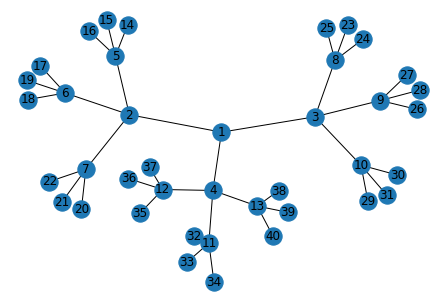

In [7]:
nx.draw(G, with_labels=True)# Visualizziamo il grafico